####  DataSet comes from National Center of Education State (NCES) Table 330.20 
##### Our dataset includes: 
*  Year:  2013- 2021 
*   State:  All states including District of Columbia 
*   Type:   Private, Public In-State, and Public Out-of-State
*  Lenth:  2-year Associate and 4-year Bachelor
*  Expense: Fees/Tuition  and Room/Board
*  Cost:  Average cost for the particular expenses in USD (United States Dollar)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import os
import matplotlib.cm as cm

warnings.filterwarnings("ignore")

**Import csv file and display initial dataframe**

In [2]:
school_df = pd.read_csv("data_sources/nces330_20.csv")
school_df = school_df.dropna()
school_df = school_df.rename(columns={"Value": "Cost"})
school_df.head()

,Year,State,Type,Length,Expense,Cost
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


Cleaning up the data

In [3]:
unique_schools = (school_df["State"]).unique()
print(unique_schools)


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Validating the Count Per State

In [4]:
school_df["State"].value_counts()

Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa                    71
K

Reviewing Data Types 

In [5]:
# Get dataset info
school_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Cost     3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [6]:
# Display the description of the dataframe
school_df.describe()


,Year,Cost
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [7]:
# Get the dimension of the dataframe
school_df.shape
# Check for the missing values in the dataset
school_df.isna().sum()


Year       0
State      0
Type       0
Length     0
Expense    0
Cost       0
dtype: int64

In [8]:
state_codes = {"Alabama": "AL", "Montana": "MT", "New Hampshire": "NH", "New Jersey": "NJ",
               "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
               "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", 
               "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
               "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", 
               "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Nebraska": "NE",
               "Missouri": "MO", "Illinois": "IL", "California": "CA", "Connecticut": "CT",
               "Arkansas": "AR", "Arizona": "AZ", "Florida": "FL", "Georgia": "GA",
               "Hawaii": "HI", "Idaho": "ID", "Mississippi": "MS", "Indiana": "IN",
               "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
               "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI",
               "Minnesota": "MN", "Colorado": "CO", "Nevada": "NV", "Alaska": "AK",
               "Delaware": "DE", "Wyoming": "WY", "District of Columbia": "DC"}

school_df["State Code"] = school_df["State"].map(state_codes)

**Create seperate dataframes for fees/tuition and room/board. Create frames for 3 year period**

In [14]:
fees_tuition_data = school_df[school_df["Expense"].str.lower().str.contains("fees/tuition")]
fees_tuition_data["Expense"] = fees_tuition_data["Expense"].str.replace("Room/Board", "")
fees_tuition_data.reset_index(drop = True, inplace = True)

room_board_data = school_df[school_df["Expense"].str.lower().str.contains("room/board")]
room_board_data["Expense"] = room_board_data["Expense"].str.replace("Fees/Tuition", "")
room_board_data.reset_index(drop = True, inplace = True)

fees_tuition_data_2019 = fees_tuition_data[fees_tuition_data["Year"] == 2019]
fees_tuition_data_2020 = fees_tuition_data[fees_tuition_data["Year"] == 2020]


**Further separate frames into private and public institutions, three years**

In [15]:
school_private_2021 = fees_tuition_data[fees_tuition_data["Type"] == "Private"].groupby(["State"]).max()
school_private_2021 = school_private_2021.sort_values(by="Cost")
school_private_2021 = school_private_2021[school_private_2021["Year"] == 2021]
del school_private_2021["Year"]

school_public_2021 = fees_tuition_data[fees_tuition_data["Type"] != "Private"].groupby(["State"]).max()
school_public_2021 = school_public_2021.sort_values(by="Cost")
school_public_2021 = school_public_2021[school_public_2021["Year"] == 2021]
del school_public_2021["Year"]

In [16]:
school_private_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Type"] == "Private"].groupby(["State"]).max()
school_private_2019 = school_private_2019.sort_values(by="Cost")

school_public_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Type"] != "Private"].groupby(["State"]).max()
school_public_2019 = school_public_2019.sort_values(by="Cost")

**Finally, grab the differences between two and four year costs, 2021 and 2019**

In [17]:
school_twoyear = fees_tuition_data[fees_tuition_data["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear = school_twoyear.sort_values(by="Cost")
school_twoyear = school_twoyear[school_twoyear["Year"] == 2021]
del school_twoyear["Year"]

school_twoyear_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear_2019 = school_twoyear_2019.sort_values(by="Cost")
del school_twoyear_2019["Year"]

school_fouryear_public_2021 = school_public_2021[school_public_2021["Length"] == "4-year"]
school_fouryear_public_2021.head()

school_fouryear_public_2019 = school_public_2019[school_public_2019["Length"] == "4-year"]
del school_fouryear_public_2019["Year"]

In [18]:
school_private_2020 = fees_tuition_data_2020[fees_tuition_data_2020["Type"] == "Private"].groupby([
    "State"]).max()
school_private_2020 = school_private_2020.sort_values(by="Cost")
school_private_2020 = school_private_2020[school_private_2020["Year"] == 2020]
del school_private_2020["Year"]


school_public_2020 = fees_tuition_data_2020[fees_tuition_data_2020["Type"] != "Private"].groupby([
                                                                                                 "State"]).max()
school_public_2020 = school_public_2020.sort_values(by="Cost")
school_public_2020 = school_public_2020[school_public_2020["Year"] == 2020]
del school_public_2020["Year"]
school_public_2020.head()


,Type,Length,Expense,Cost,State Code
State,,,,,
District of Columbia,Public Out-of-State,4-year,Fees/Tuition,12704,DC
South Dakota,Public Out-of-State,4-year,Fees/Tuition,12866,SD
North Dakota,Public Out-of-State,4-year,Fees/Tuition,13936,ND
Wyoming,Public Out-of-State,4-year,Fees/Tuition,14803,WY
Florida,Public Out-of-State,4-year,Fees/Tuition,18514,FL


In [26]:
school_twoyear_2020 = fees_tuition_data_2020[fees_tuition_data_2020["Length"]
                                             == "2-year"].groupby(["State"]).max()
school_twoyear_2020 = school_twoyear_2020.sort_values(by="Cost")
school_twoyear_2020 = school_twoyear_2020[school_twoyear_2020["Year"] == 2020]


school_fouryear_public_2020 = school_public_2020[school_public_2020["Length"] == "4-year"]
school_fouryear_public_2020.head()

school_fouryear_public_2020 = school_public_2020[school_public_2020["Length"] == "4-year"]

school_fouryear_public_2020.head()



,Type,Length,Expense,Cost,State Code
State,,,,,
District of Columbia,Public Out-of-State,4-year,Fees/Tuition,12704,DC
South Dakota,Public Out-of-State,4-year,Fees/Tuition,12866,SD
North Dakota,Public Out-of-State,4-year,Fees/Tuition,13936,ND
Wyoming,Public Out-of-State,4-year,Fees/Tuition,14803,WY
Florida,Public Out-of-State,4-year,Fees/Tuition,18514,FL


In [23]:
# Compute yearly expenses /cost
avg_yearly_cost = school_df.groupby(['Year','Expense']).mean().round(2).reset_index() 
avg_yearly_cost.head()


,Year,Expense,Cost
0,2013,Fees/Tuition,12630.67
1,2013,Room/Board,9278.98
2,2014,Fees/Tuition,13087.60
3,2014,Room/Board,9578.55
4,2015,Fees/Tuition,13481.23


In [20]:
# Separate expenses / cost (Fees/Tuition) & Room/Board
yearly_cost_fees_tuition = avg_yearly_cost['Cost'] == 'Fees/Tuition'
yearly_cost_Room_Board = avg_yearly_cost['Cost'] == 'Room_Board'
yearly_fees_tuition = avg_yearly_cost[yearly_cost_fees_tuition].groupby('Year')['Cost'].mean().round(2) 
yearly_Room_Board = avg_yearly_cost[yearly_cost_Room_Board].groupby('Year')['Cost'].mean().round(2) 


In [21]:
# Get the median cost 
median_cost = school_df['Cost'].median()
median_cost

10203.5

In [27]:
# Get the average cost all state
avg_cost_state = school_df.groupby('State')['Cost'].mean().sort_values()
avg_cost_state.head(    )

State
Idaho           8609.197183
Wyoming         8725.293103
Utah            8918.549296
North Dakota    9227.746479
South Dakota    9647.070423
Name: Cost, dtype: float64

In [28]:
# Average cost on the length of study
length_study = school_df.groupby(['Length']).mean().reset_index()
length_study
#plt.bar(length_study['Length'], length_study['Cost'], )

,Length,Year,Cost
0,2-year,2016.93379,6107.021689
1,4-year,2016.91991,15296.631737


In [29]:
# Filter average cost depending on expense type Fees/Tuition & Room/Board
expense_type = school_df.groupby('Expense')['Cost'].mean().round(2)
expense_type

Expense
Fees/Tuition    14614.07
Room/Board      10444.90
Name: Cost, dtype: float64

In [30]:
# Nema added 4/8 Average Cost by Institution Type
type_expense = school_df.groupby(['Type','Expense']).mean().reset_index()
type_expense = type_expense.sort_values( by = "Cost")
type_expense[['Type','Expense', 'Cost']]

,Type,Expense,Cost
2,Public In-State,Fees/Tuition,6317.919622
3,Public In-State,Room/Board,10231.495556
5,Public Out-of-State,Room/Board,10231.495556
1,Private,Room/Board,10871.720000
4,Public Out-of-State,Fees/Tuition,16327.268673
0,Private,Fees/Tuition,26662.002198


## Plot out costs gathered from created DataFrames and compare them to eachother

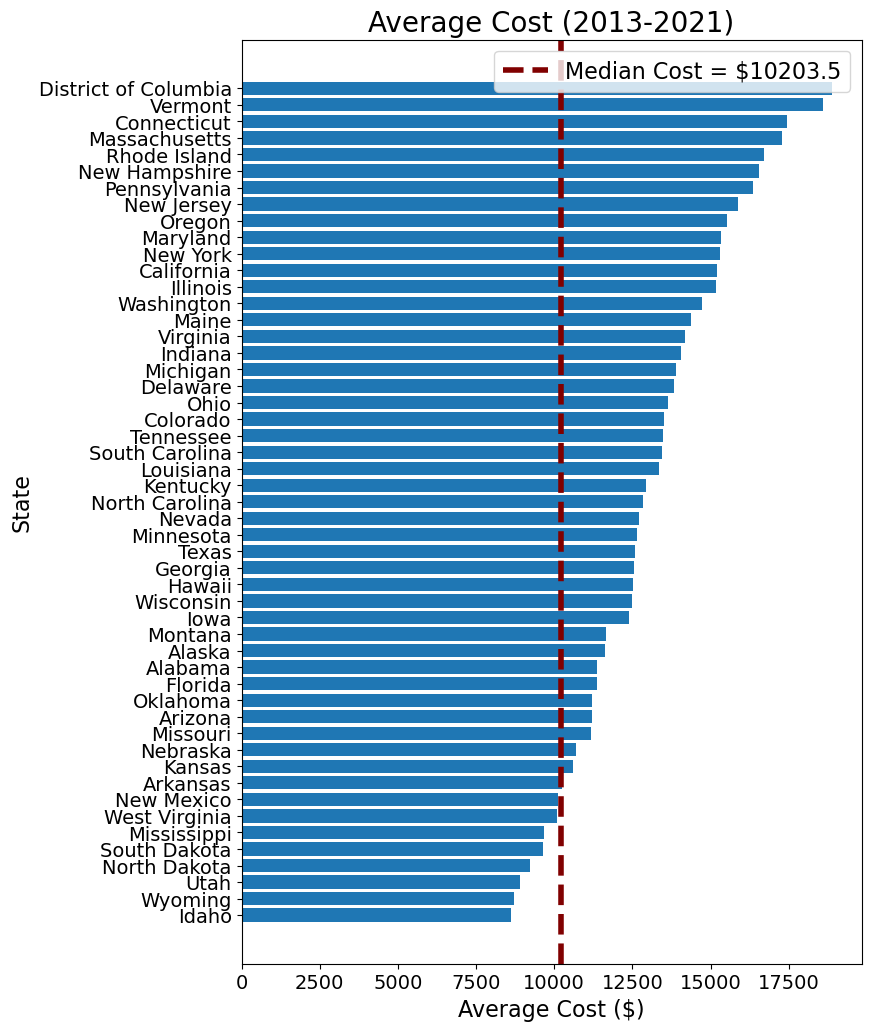

In [36]:
# Plot the average cost of all states and add a vertical line (median)
plt.figure(figsize=(8,12))
plt.barh(avg_cost_state.index, avg_cost_state.values, color="#1f77b4")
plt.title("Average Cost (2013-2021)", fontsize = 20)
plt.xlabel("Average Cost ($)", fontsize = 16)
plt.ylabel("State", fontsize = 16)
plt.axvline(median_cost, color= "maroon", ls ="--", label = f'Median Cost = ${median_cost}',lw= 4)
plt.legend(fontsize = 16, loc ="upper right")
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

In [37]:
## Analysis: The median (cost) is $10,203.5. Most states are above the median. Idaho, Wyoming, Utah, North Dakota, South Dakota, Mississippi, West Virginia, & New Mexico were the states below the median.

In [43]:
length_study_plot = px.bar(length_study, 
                    x = length_study['Length'], 
                    y = length_study['Cost'], 
                    text = length_study['Cost'].astype(int),
                    title= 'Length of Study Average Cost (Fees/Tuition & Room/Board)')
                    

length_study_plot.show()

# Analysis: The 4 year average cost is higher, slighty more than twice, the cost of a 2 year education.

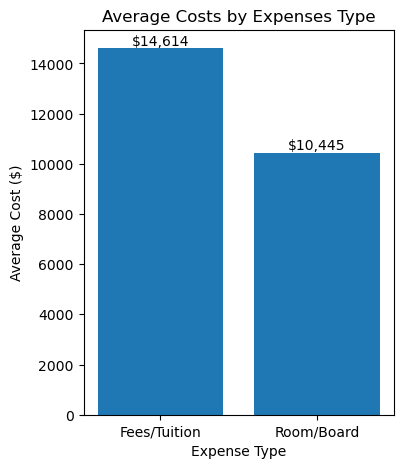

In [44]:
# Plot expenses type comparison Fees/Tuition vs Room/Board
figure, axes = plt.subplots(figsize= (4,5))
expense_type_plot = axes.bar(expense_type.index, expense_type.values)
axes.bar_label(expense_type_plot, fmt='${:,.0f}', color ="black")
plt.title("Average Costs by Expenses Type")
plt.xlabel("Expense Type")
plt.ylabel("Average Cost ($)")
plt.show()

Analysis: Fees/Tuition expenses is higher than Room/Board costs.


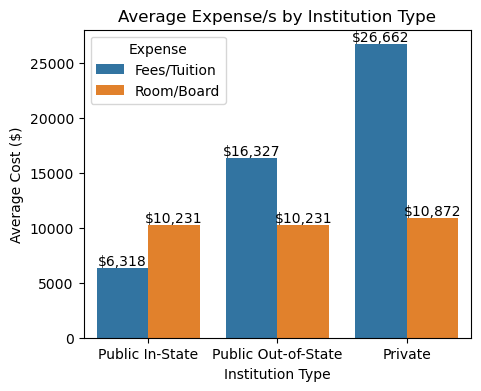

In [46]:
figure, axes = plt.subplots(figsize= (5,4))
axes = sns.barplot(data = type_expense, x = "Type", y = "Cost", hue = 'Expense')
plt.title("Average Expense/s by Institution Type")
plt.bar_label(axes.containers[0], fmt='${:,.0f}', color ="black")
plt.bar_label(axes.containers[1], fmt='${:,.0f}', color ="black")
plt.xlabel("Institution Type")
plt.ylabel("Average Cost ($)")
plt.show()

Fees/Tuition shows higher in Private Institution, public in-state has the lowest costs. 
For room/board expenses, it's showing the average cost to be same on all type.

_
### Plot 2019 and 2021 cost of 4 year public and private education
_

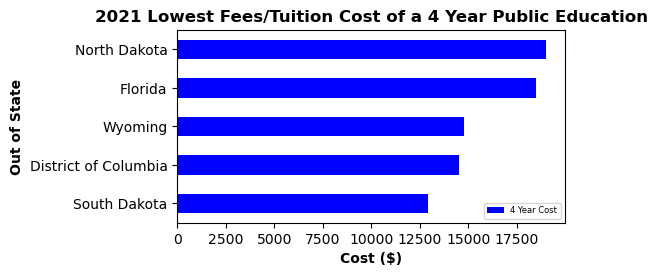

In [47]:
school_fouryear_public_2021[:5].plot.barh(figsize=(5, 2.5), color="Blue")
plt.legend(labels=["4 Year Cost"], fontsize=6)
plt.title("2021 Lowest Fees/Tuition Cost of a 4 Year Public Education",
          fontweight="bold")
plt.xlabel("Cost ($)", fontweight="bold")
plt.ylabel("Out of State", fontweight="bold")
plt.savefig(os.path.join("output", "public_2021_low.png"))
plt.show()



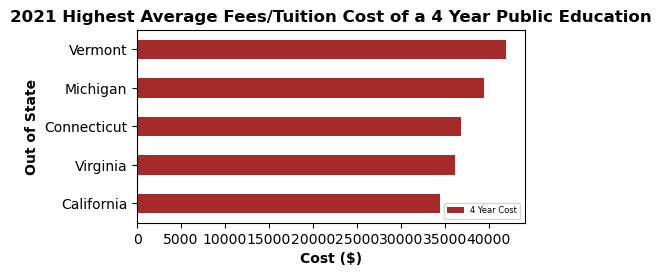

In [50]:
school_fouryear_public_2021[46:].plot.barh(figsize=(5, 2.5), color="brown")
plt.legend(labels=["4 Year Cost"], fontsize=6)
plt.title("2021 Highest Average Fees/Tuition Cost of a 4 Year Public Education",
          fontweight="bold")
plt.xlabel("Cost ($)", fontweight="bold")
plt.ylabel("Out of State", fontweight="bold")
plt.savefig(os.path.join("output", "public_2021_high.png"))
plt.show()



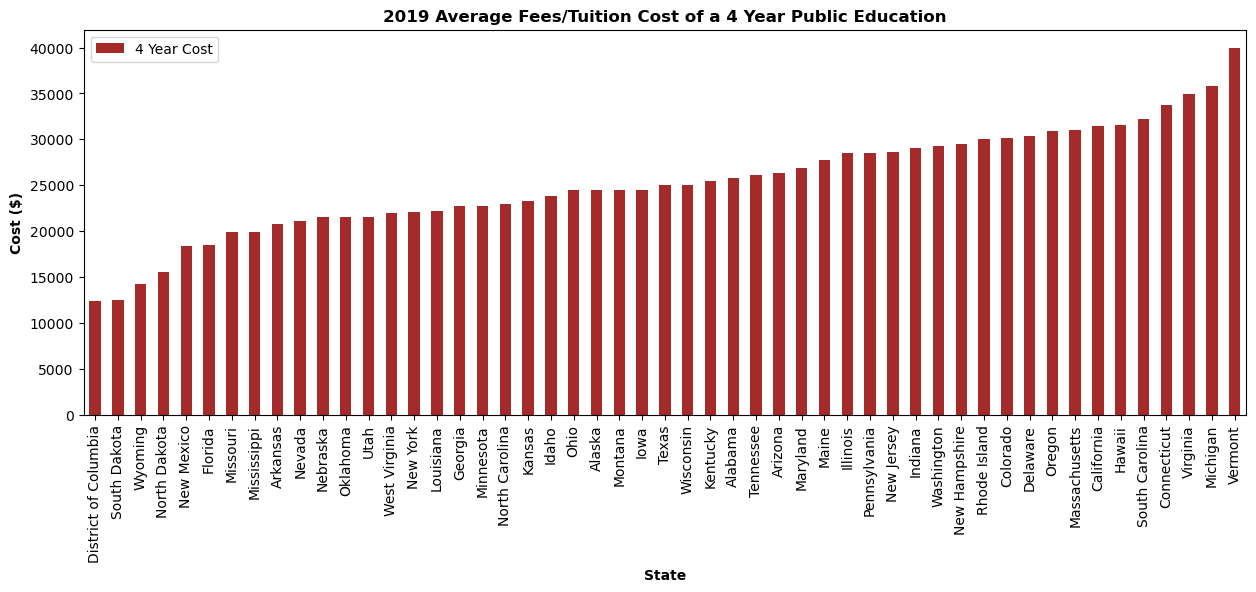

In [ ]:
school_fouryear_public_2019.plot.bar(figsize = (15  ,5), color="brown")
plt.legend(labels=["4 Year Cost"])
plt.title("2019 Average Fees/Tuition Cost of a 4 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()

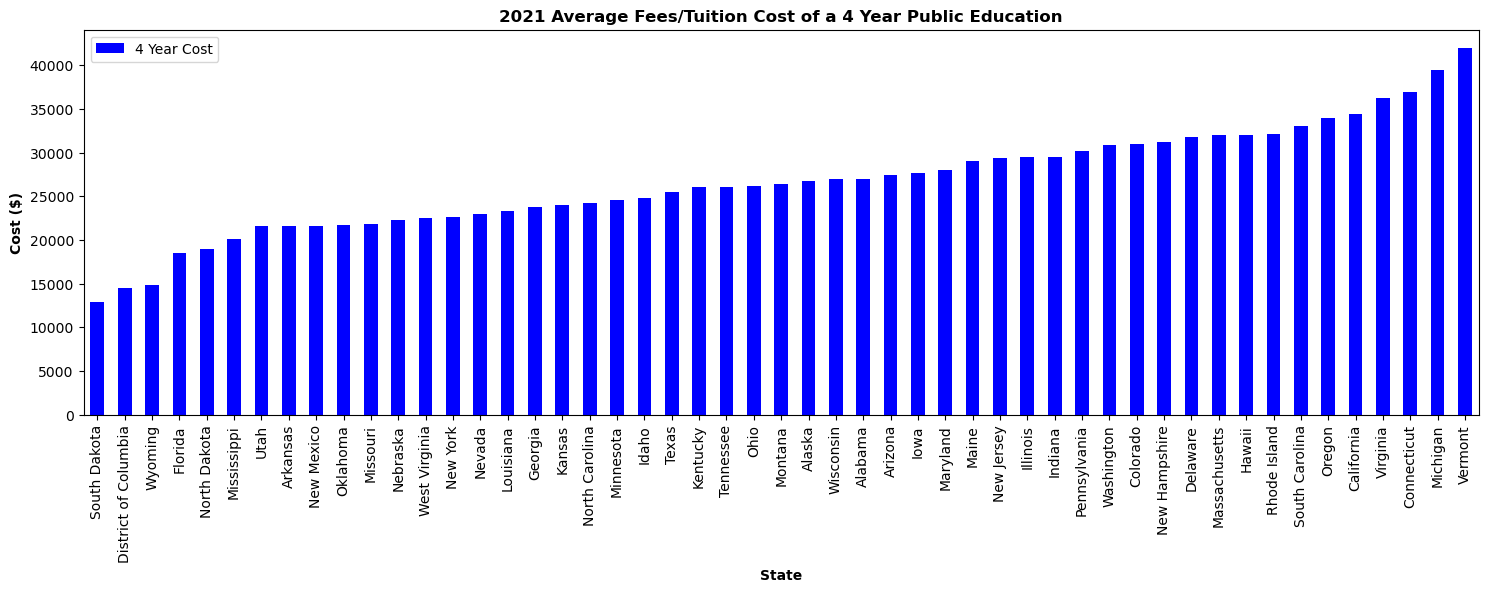

In [ ]:
school_fouryear_public_2021.plot.bar(figsize = (18,5), color="blue")
plt.legend(labels=["4 Year Cost"])
plt.title("2021 Average Fees/Tuition Cost of a 4 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()

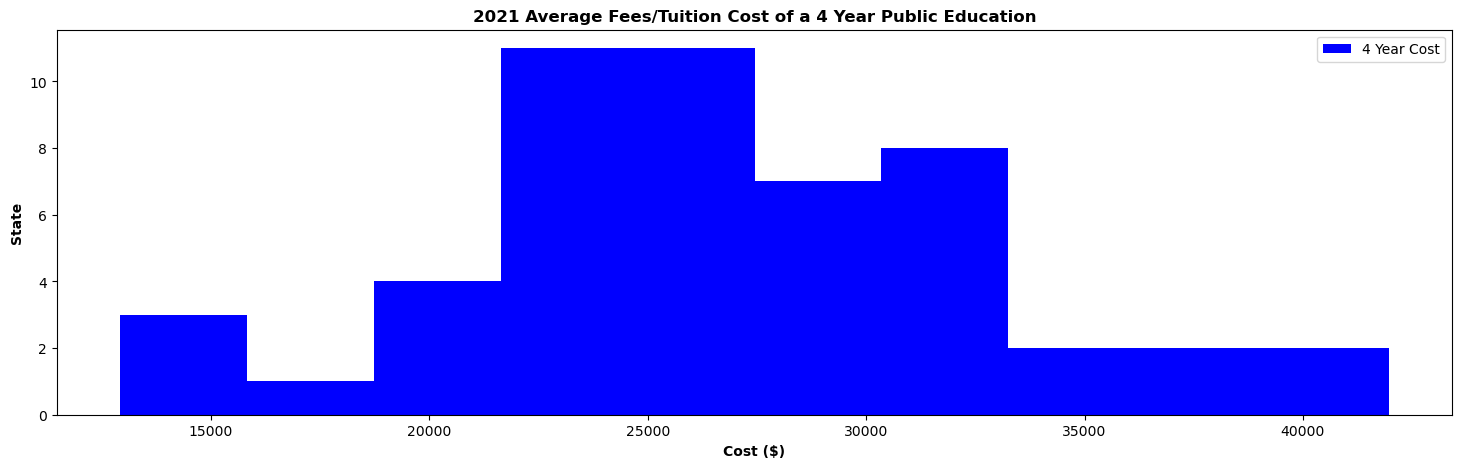

,Cost
count,51.000000
mean,26711.117647
std,6064.051918
min,12924.000000
25%,22572.000000
50%,26368.000000
75%,30910.500000
max,41963.000000


In [51]:
school_fouryear_public_2021.plot.hist(figsize=(18, 5), color="blue")
plt.legend(labels=["4 Year Cost"])
plt.title("2021 Average Fees/Tuition Cost of a 4 Year Public Education",
          fontweight="bold")
plt.xlabel("Cost ($)", fontweight="bold")
plt.ylabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()
school_fouryear_public_2021.describe()


In [ ]:
combined_for_plot_2021 = pd.merge(school_fouryear_public_2019, school_fouryear_public_2021, on=[
                                  "State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2021 = combined_for_plot_2021.rename(columns={"Cost_x": "Cost 2019",
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2021["Tuition_Diff_2021-2019"] = combined_for_plot_2021["Cost 2021"] - \
    combined_for_plot_2021["Cost 2019"]
combined_for_plot_2021["% Tuition Increase 2019-2021"] = (
    combined_for_plot_2021["Tuition_Diff_2021-2019"] / combined_for_plot_2021["Cost 2019"])*100
combined_for_plot_2021.head()




,Type,Length,Expense,Cost 2019,State Code,Cost 2021,Tuition_Diff_2021-2019,% Tuition Increase 2019-2021
State,,,,,,,,
District of Columbia,Public Out-of-State,4-year,Fees/Tuition,12416,DC,14540,2124,17.106959
South Dakota,Public Out-of-State,4-year,Fees/Tuition,12465,SD,12924,459,3.682310
Wyoming,Public Out-of-State,4-year,Fees/Tuition,14268,WY,14803,535,3.749650
North Dakota,Public Out-of-State,4-year,Fees/Tuition,15565,ND,19021,3456,22.203662
New Mexico,Public Out-of-State,4-year,Fees/Tuition,18350,NM,21645,3295,17.956403


"Percentage Variance from 2019 to 2021 Public out of state 4 years"

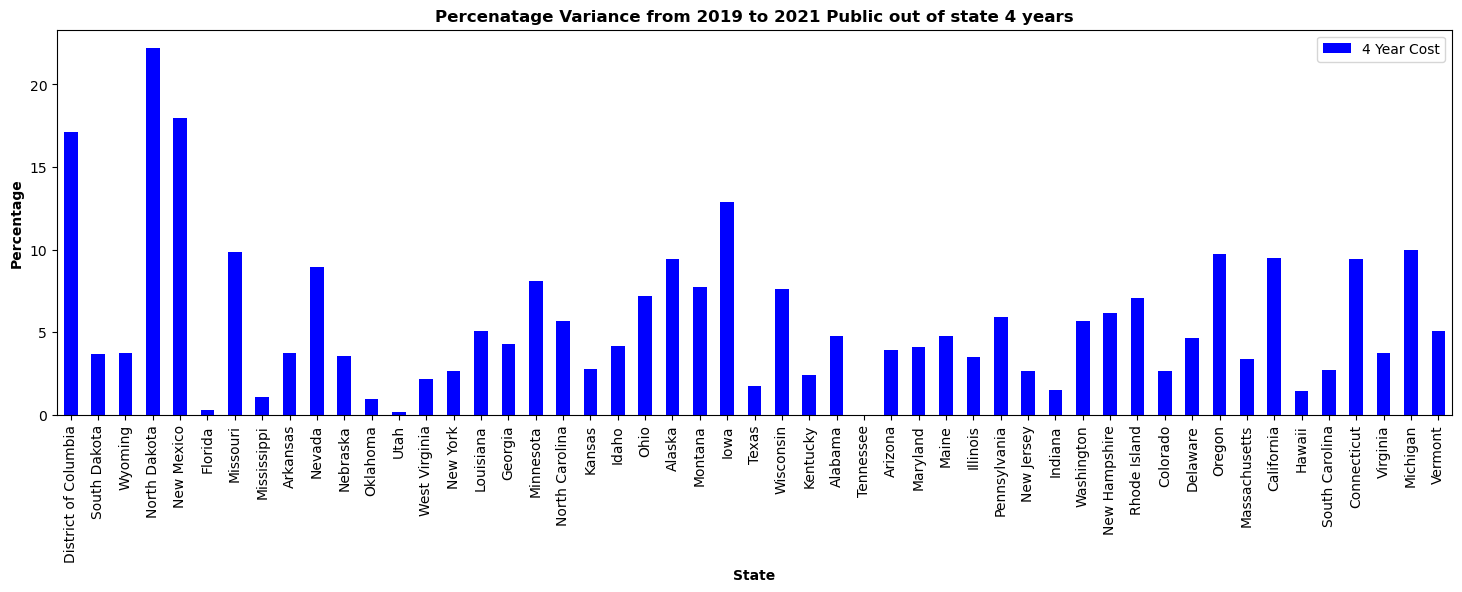

In [ ]:
combined_for_plot_2021["% Tuition Increase 2019-2021"].plot.bar(figsize=(18, 5), color="blue")
plt.legend(labels=["4 Year Cost"])
plt.title("Percenatage Variance from 2019 to 2021 Public out of state 4 years",
          fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Percentage", fontweight="bold")
#plt.text(combined_for_plot_2021["% Tuition Increase 2019-2021"])

# plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()


In [ ]:
combined_for_plot_2021 = pd.merge(school_fouryear_public_2019, school_fouryear_public_2021, on=["State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2021 = combined_for_plot_2021.rename(columns={"Cost_x": "Cost 2019", 
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2021.head()

,Type,Length,Expense,Cost 2019,State Code,Cost 2021
State,,,,,,
District of Columbia,Public Out-of-State,4-year,Fees/Tuition,12416,DC,14540
South Dakota,Public Out-of-State,4-year,Fees/Tuition,12465,SD,12924
Wyoming,Public Out-of-State,4-year,Fees/Tuition,14268,WY,14803
North Dakota,Public Out-of-State,4-year,Fees/Tuition,15565,ND,19021
New Mexico,Public Out-of-State,4-year,Fees/Tuition,18350,NM,21645


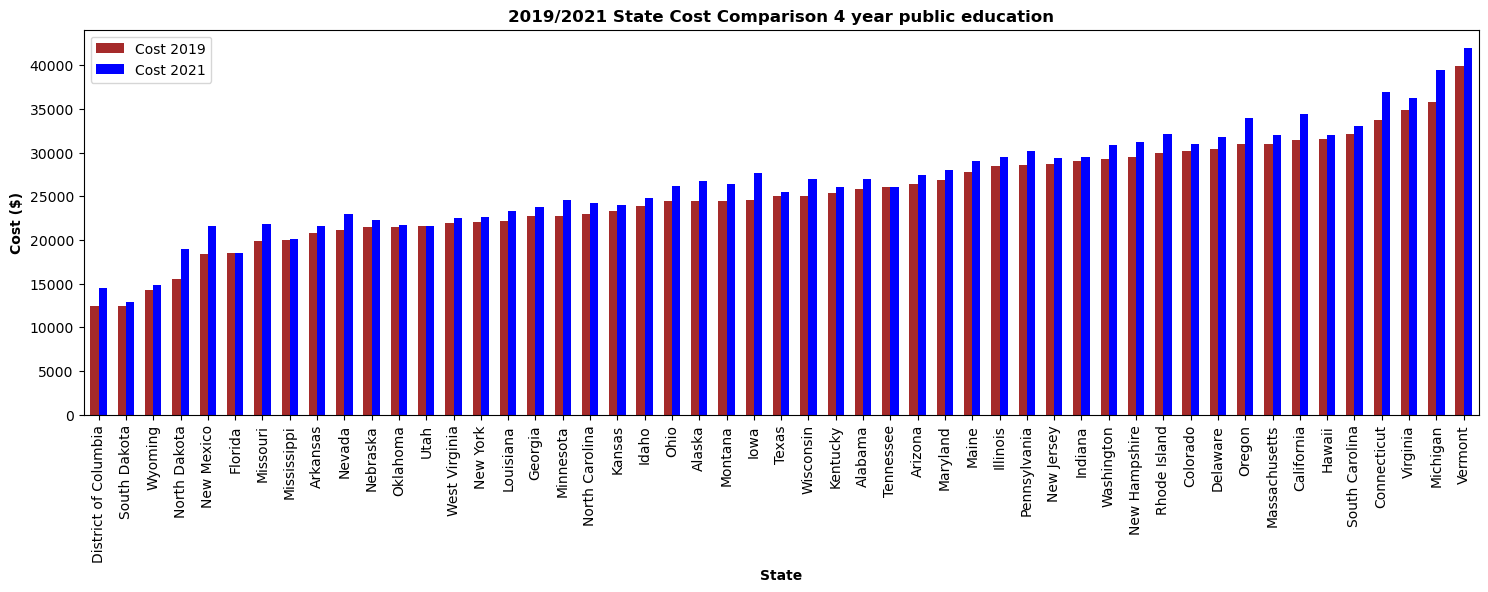

In [ ]:
combined_for_plot_2021.plot.bar(figsize = (18, 5), color=["brown", "blue"], width = 0.6)
plt.title("2019/2021 State Cost Comparison 4 year public education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "four_comparison_2019_2021.png"))
plt.show()

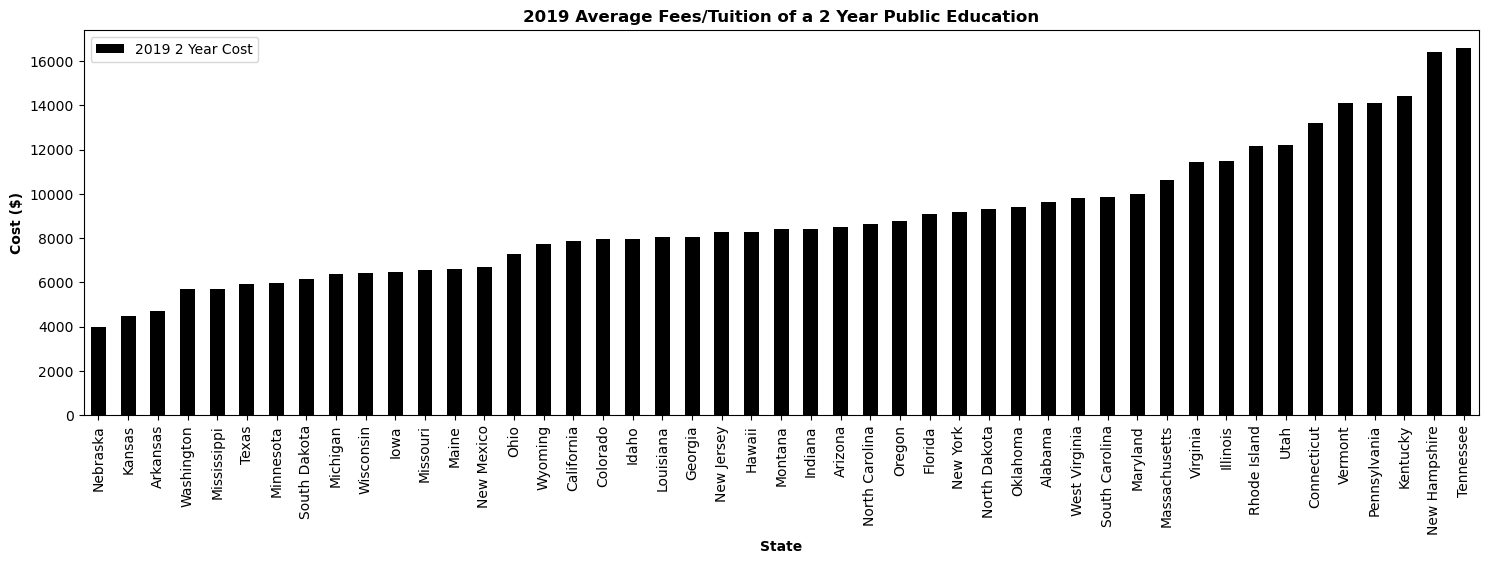

In [ ]:
school_twoyear_2019.plot.bar(figsize = (18,5), color="black")
plt.legend(labels=["2019 2 Year Cost"])
plt.title("2019 Average Fees/Tuition of a 2 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "two_year_public_2019.png"))
plt.show()

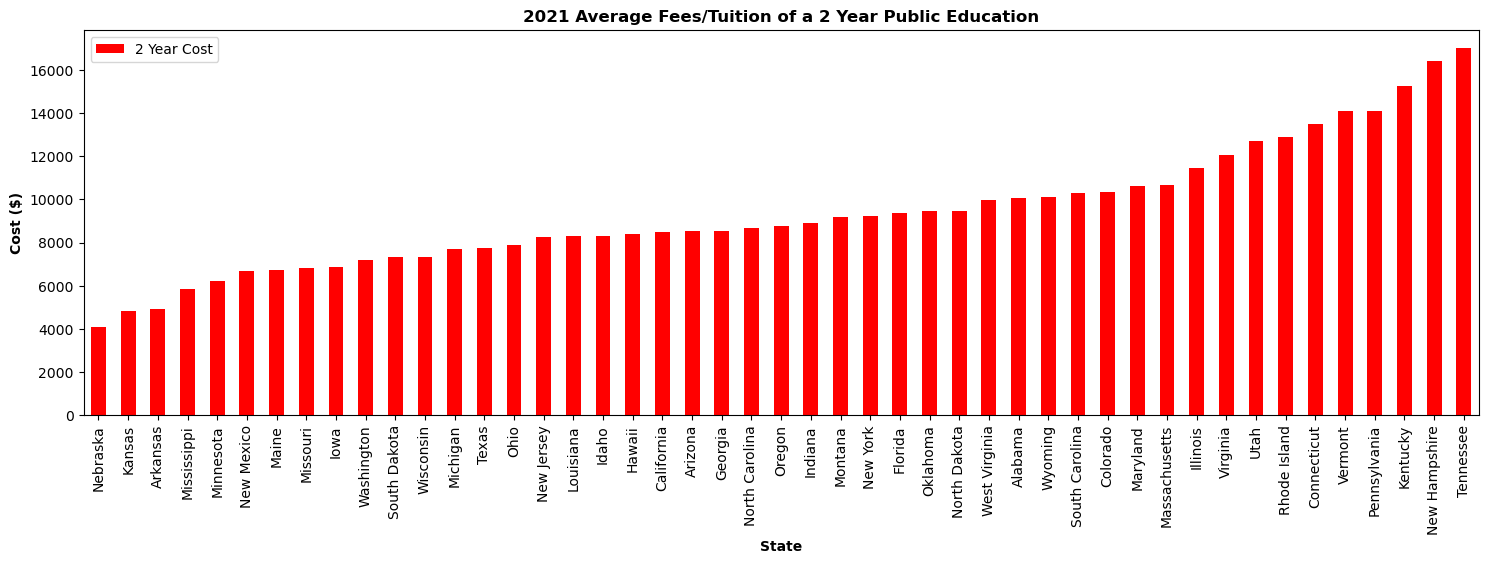

In [ ]:
school_twoyear.plot.bar(figsize = (18,5), color="red")
plt.legend(labels=["2 Year Cost"])
plt.title("2021 Average Fees/Tuition of a 2 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "two_year_public_2021.png"))
plt.show()

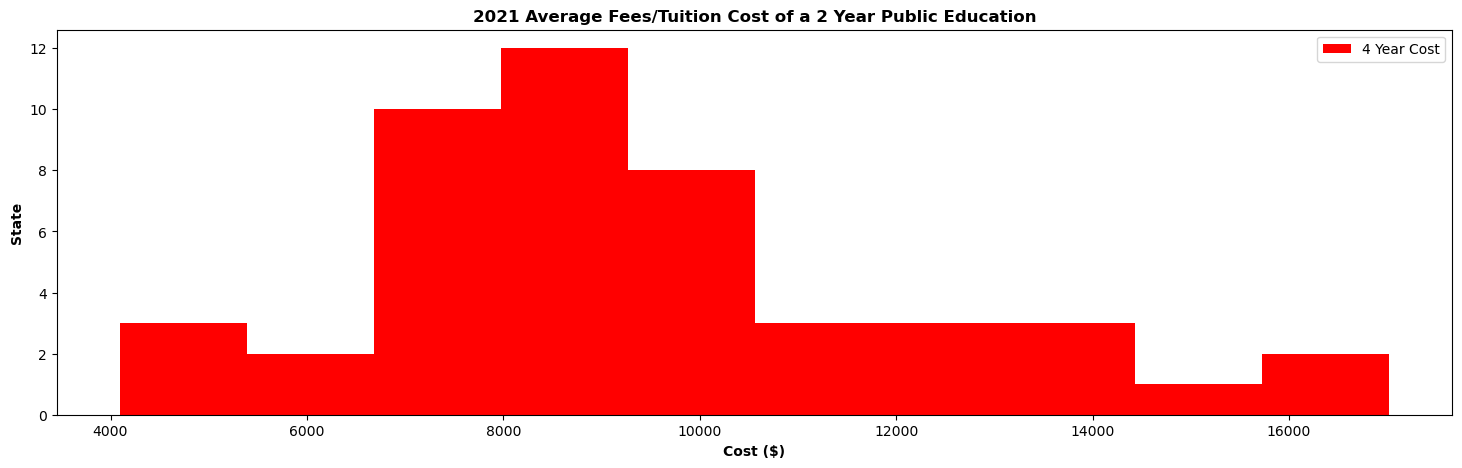

,Cost
count,47.000000
mean,9397.787234
std,2922.144790
min,4101.000000
25%,7521.500000
50%,8779.000000
75%,10488.500000
max,17013.000000


In [54]:
school_twoyear.plot.hist(figsize=(18, 5), color="red")
plt.legend(labels=["4 Year Cost"])
plt.title("2021 Average Fees/Tuition Cost of a 2 Year Public Education",
          fontweight="bold")
plt.xlabel("Cost ($)", fontweight="bold")
plt.ylabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()
school_twoyear.describe()


**Combine 2year dataframes to make comparison chart**

In [ ]:
combined_for_plot_2year = pd.merge(school_twoyear_2019, school_twoyear, on=["State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2year = combined_for_plot_2year.rename(columns={"Cost_x": "Cost 2019", 
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2year.head()

,Type,Length,Expense,Cost 2019,State Code,Cost 2021
State,,,,,,
Nebraska,Public Out-of-State,2-year,Fees/Tuition,3985,NE,4101
Kansas,Public Out-of-State,2-year,Fees/Tuition,4491,KS,4828
Arkansas,Public Out-of-State,2-year,Fees/Tuition,4698,AR,4905
Washington,Public Out-of-State,2-year,Fees/Tuition,5691,WA,7186
Mississippi,Public Out-of-State,2-year,Fees/Tuition,5709,MS,5835


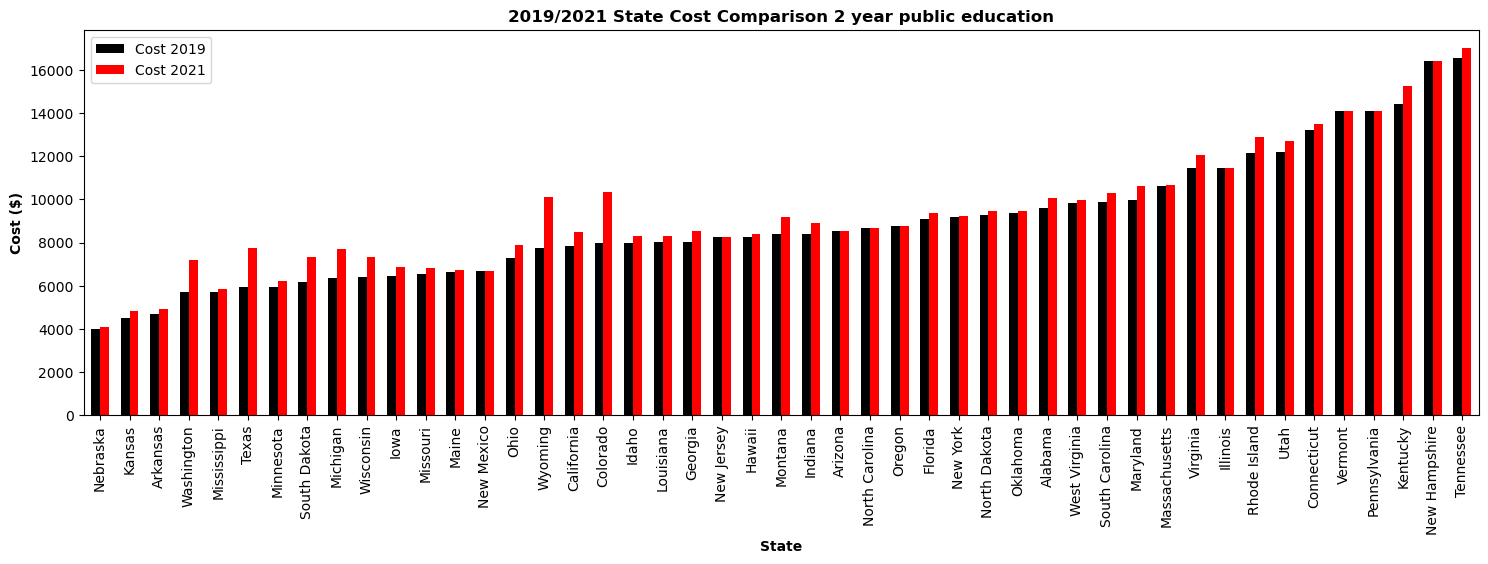

In [ ]:
combined_for_plot_2year.plot.bar(figsize = (18, 5), color=["black", "red"], width = 0.6)
plt.title("2019/2021 State Cost Comparison 2 year public education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "two_comparison_2019_2021.png"))
plt.show()

_
### Plots to compare 2021 plot data to eachother to see differences in education cost per state
_

In [ ]:
combined_for_plot = pd.merge(school_fouryear_public_2021, school_twoyear, on="State")
combined_for_plot = combined_for_plot.rename(columns={"Cost_x": "4 Year Cost", "Cost_y": "2 Year Cost"})

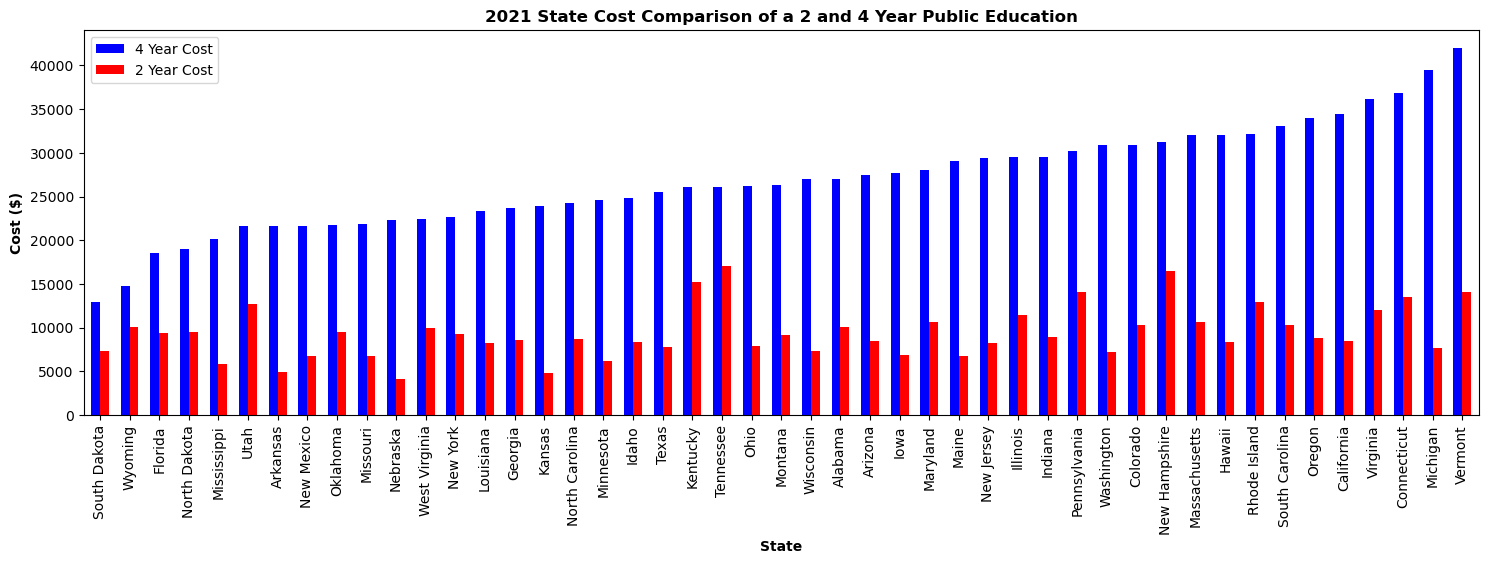

In [ ]:
combined_for_plot.plot.bar(figsize = (18, 5), color=["blue", "red"], width = 0.6)
plt.title("2021 State Cost Comparison of a 2 and 4 Year Public Education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "two_four_comparison.png"))
plt.show()

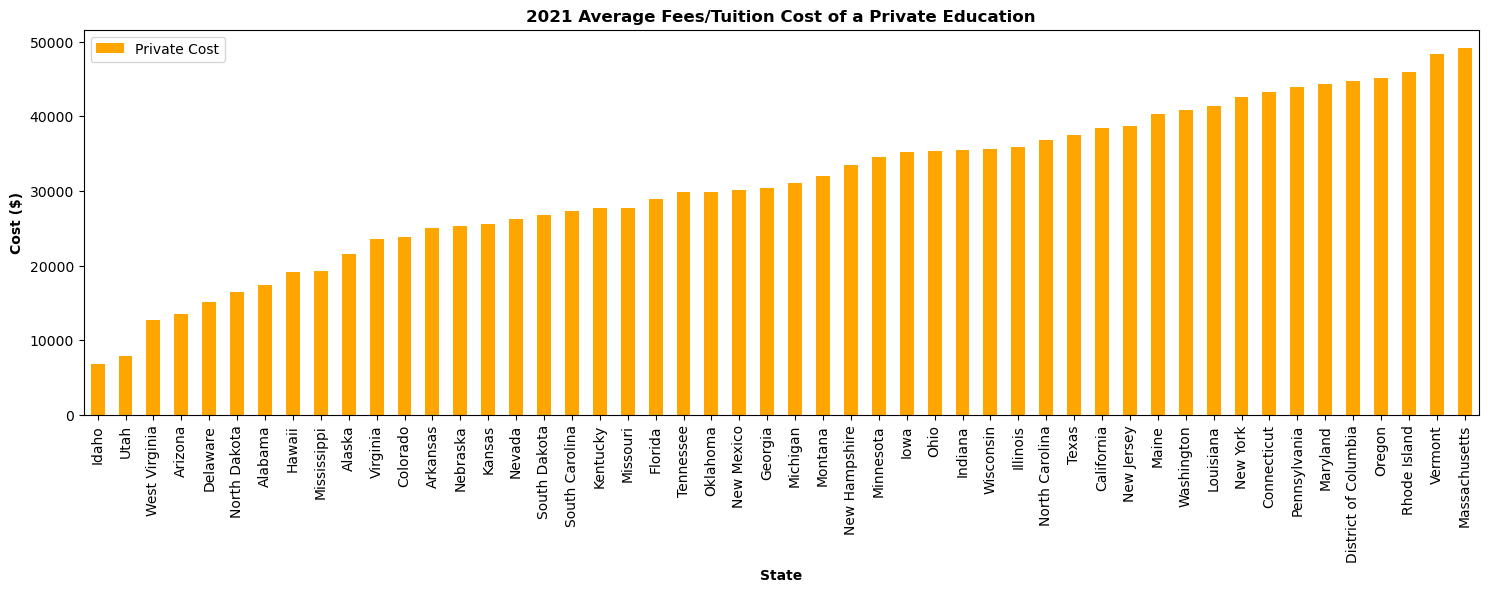

In [ ]:
school_private_2021.plot.bar(figsize = (18, 5), color = "orange")
plt.legend(labels=["Private Cost"])
plt.title("2021 Average Fees/Tuition Cost of a Private Education", fontweight = "bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "private.png"))
plt.show()

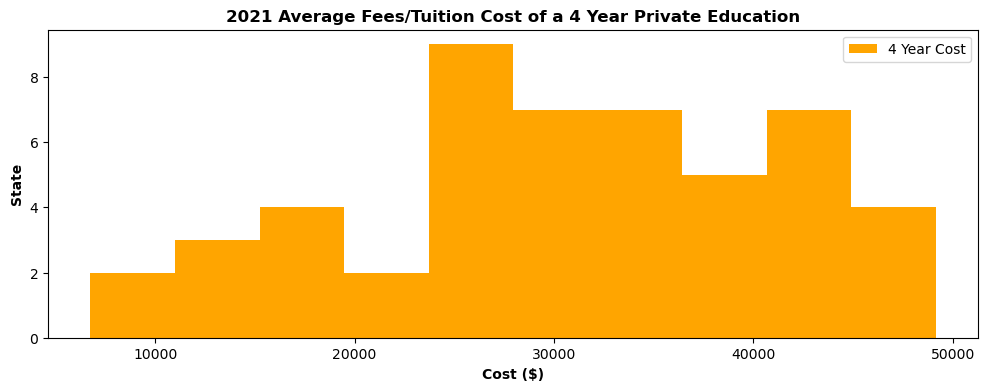

Cost    30949.86
dtype: float64

In [58]:
school_private_2021.plot.hist(figsize=(12, 4), color="orange")
plt.legend(labels=["4 Year Cost"])
plt.title("2021 Average Fees/Tuition Cost of a 4 Year Private Education",
          fontweight="bold")
plt.xlabel("Cost ($)", fontweight="bold")
plt.ylabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()
school_private_2021.mean()


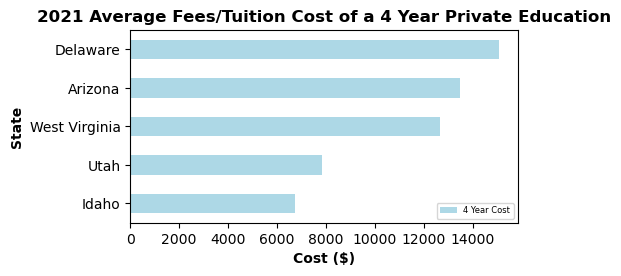

In [61]:
school_private_2021[:5].plot.barh(figsize=(5, 2.5), color="lightBlue")
plt.legend(labels=["4 Year Cost"], fontsize=6)
plt.title("2021 Average Fees/Tuition Cost of a 4 Year Private Education",
          fontweight="bold")
plt.xlabel("Cost ($)", fontweight="bold")
plt.ylabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()
# school_private_2021.head()


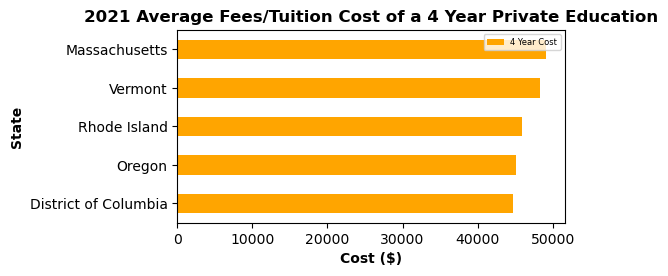

In [60]:
school_private_2021[45:].plot.barh(figsize=(5, 2.5), color="orange")
plt.legend(labels=["4 Year Cost"], fontsize=6)
plt.title("2021 Average Fees/Tuition Cost of a 4 Year Private Education",
          fontweight="bold")
plt.xlabel("Cost ($)", fontweight="bold")
plt.ylabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()
# school_private_2021.tail()


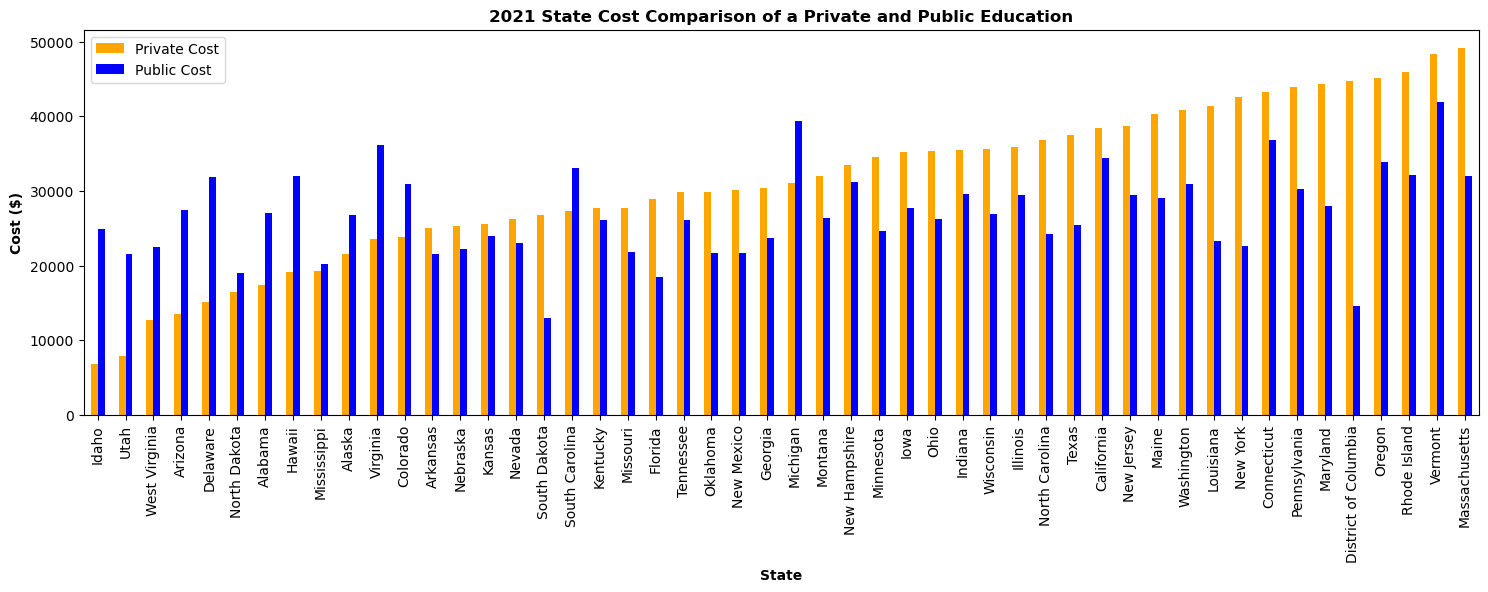

In [ ]:
df_combined = pd.concat([school_private_2021, school_fouryear_public_2021], axis=1)
df_combined = df_combined.dropna()
df_combined.plot.bar(figsize = (18, 5), color = ["orange", "blue"])
plt.legend(labels=["Private Cost", "Public Cost"])
plt.title("2021 State Cost Comparison of a Private and Public Education", fontweight = "bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "private_public_comparison.png"))
plt.show()

### Add Heatmaps showing a nice visual for where most expensive states are

In [ ]:
fig = px.choropleth(school_fouryear_public_2021,
                    locations = "State Code",
                    locationmode = "USA-states",
                    scope = "usa",
                    color = "Cost",
                    color_continuous_scale = "PuBu",
                    template = "seaborn",
                    title = "2021 Map of Fees/Tuition per state (Public 4-Year)",
                    width = 800,
                    height = 600,
                    labels = {"Cost": "Cost ($)"}
    )
fig.show()

In [ ]:
fig = px.choropleth(school_private_2021,
                    locations = "State Code",
                    locationmode = "USA-states",
                    scope = "usa",
                    color = "Cost",
                    color_continuous_scale="PuBu",
                    template = "seaborn",
                    title = "2021 Map of Fees/Tuition per state (Private 4-Year)",
                    width = 800,
                    height = 600,
                    labels = {"Cost": "Cost ($)"}
    )
fig.show()

In [62]:
### NA suggest tov work on visualization of > the average cost of undergraduate / type
type_avg_cost = school_df.groupby('Type').mean(numeric_only=True)


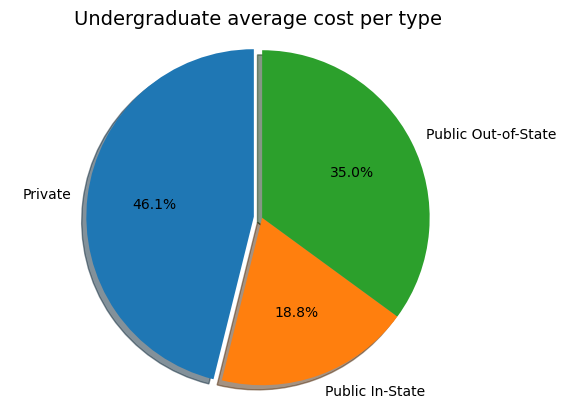

In [63]:
### NA Create the pie plot
# Plot the pie chart
explode = (0.05, .0, .0)
plt.pie(type_avg_cost['Cost'], labels=type_avg_cost.index,
        autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
plt.axis('equal')
plt.title('Undergraduate average cost per type', fontsize=14)
plt.show()


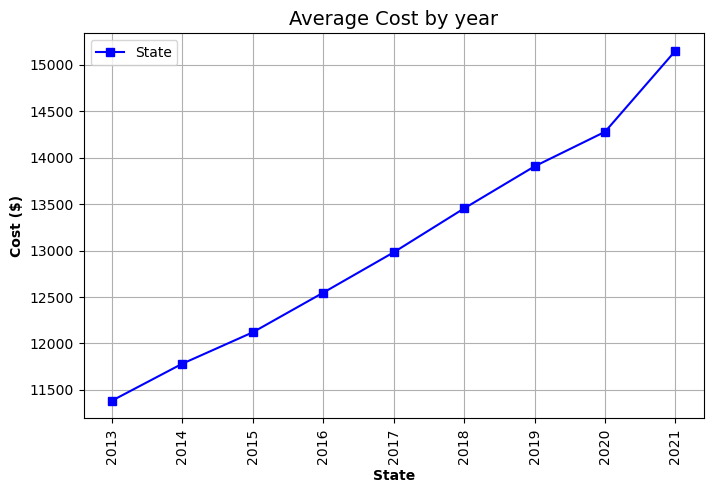

In [64]:
avg_year_cost = school_df.groupby('Year').mean(numeric_only=True)
plt.figure(figsize=(8, 5))
plt.plot(avg_year_cost.index, avg_year_cost['Cost'], marker="s", color="blue")
plt.legend(['State'], loc='upper left', fontsize=10)
plt.xlabel('State', fontweight="bold")
plt.ylabel('Cost ($)', fontweight="bold")
plt.title('Average Cost by year', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.show()
# avg_year_cost


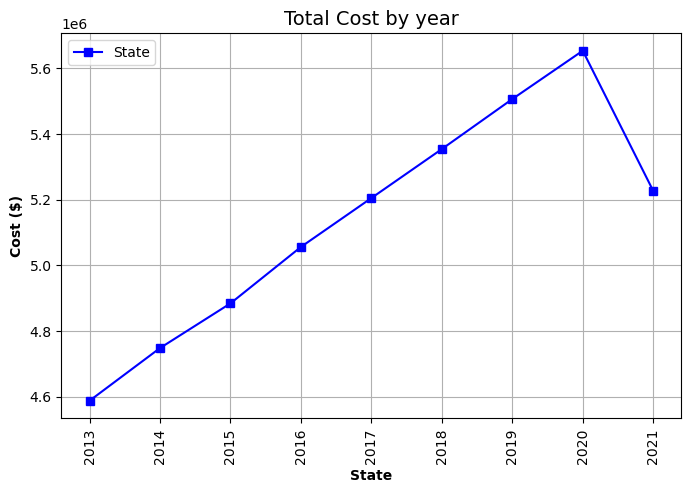

In [65]:
avg_year_cost = school_df.groupby('Year').sum(numeric_only=True)
plt.figure(figsize=(8, 5))
plt.plot(avg_year_cost.index, avg_year_cost['Cost'], marker="s", color="blue")
plt.legend(['State'], loc='upper left', fontsize=10)
plt.xlabel('State', fontweight="bold")
plt.ylabel('Cost ($)', fontweight="bold")
plt.title('Total Cost by year', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.show()
# avg_year_cost


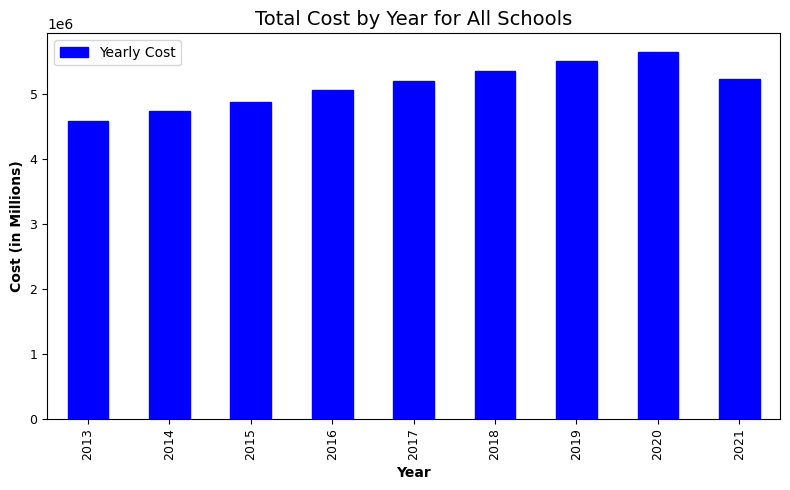

In [66]:
group_year_cost = school_df.groupby(["Year"]).sum()
colors = ["blue"]
group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                     fontsize=9, edgecolor='blue',  align="center")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year for All Schools", fontsize=14)
plt.tight_layout()
plt.show()
# print(group_year_cost)


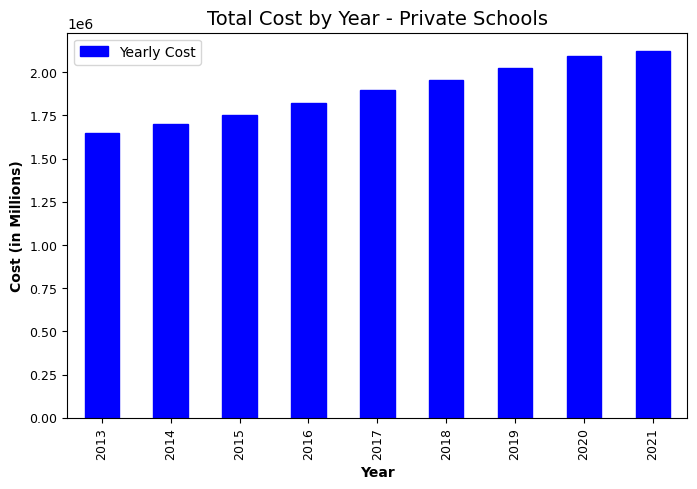

In [68]:
type_private = school_df[(school_df["Type"] == "Private")]
private_group_year_cost = type_private.groupby(["Year"]).sum()
colors = ["blue"]
private_group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                             fontsize=9, edgecolor='blue',  align="center")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - Private Schools", fontsize=14)

plt.show()
# private_group_year_cost


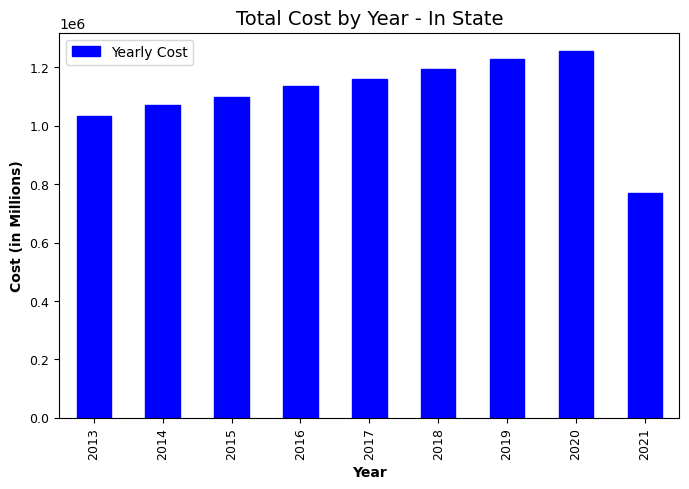

In [69]:
type_in_state = school_df[(school_df["Type"] == "Public In-State")]
type_in_state_group = type_in_state.groupby(["Year"]).sum()
colors = ["blue"]
type_in_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                         fontsize=9, edgecolor='blue',  align="center")
plt.rcParams["figure.facecolor"]
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - In State", fontsize=14)
plt.show()
# type_in_state_group


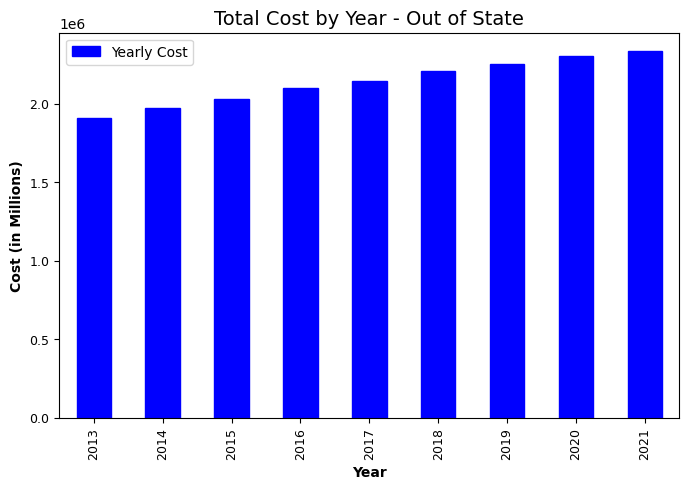

In [70]:
type_out_state = school_df[(school_df["Type"] == "Public Out-of-State")]
type_out_state_group = type_out_state.groupby(["Year"]).sum()
colors = ["blue"]
type_out_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                          fontsize=9, edgecolor='blue',  align="center")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - Out of State", fontsize=14)

plt.show()
# type_out_state_group


In [71]:
school_df

,Year,State,Type,Length,Expense,Cost,State Code
0,2013,Alabama,Private,4-year,Fees/Tuition,13983,AL
1,2013,Alabama,Private,4-year,Room/Board,8503,AL
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048,AL
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073,AL
4,2013,Alabama,Public In-State,4-year,Room/Board,8473,AL
...,...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,2-year,Fees/Tuition,3987,WY
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799,WY
3545,2021,Wyoming,Public Out-of-State,2-year,Fees/Tuition,9820,WY
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710,WY


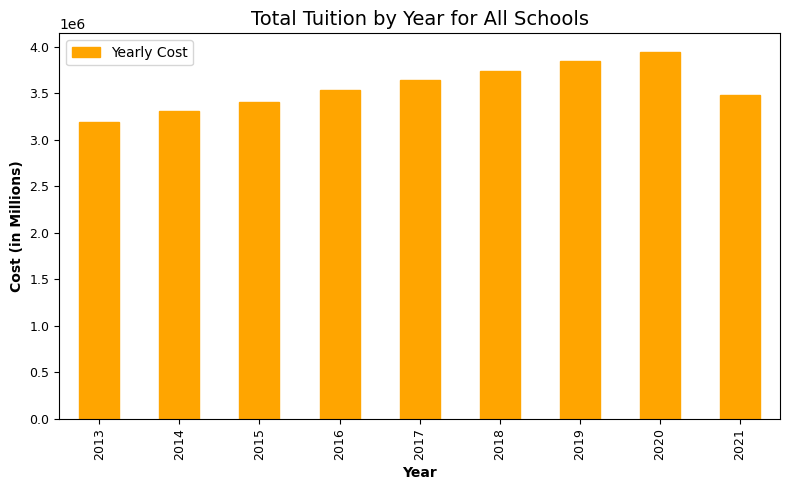

In [72]:
group_year_cost = fees_tuition_data.groupby(["Year"]).sum()
colors = ["orange","yellow"]
group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                     fontsize=9, edgecolor='orange',  align="center")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Tuition by Year for All Schools", fontsize=14)
plt.tight_layout()
plt.show()
# print(group_year_cost)


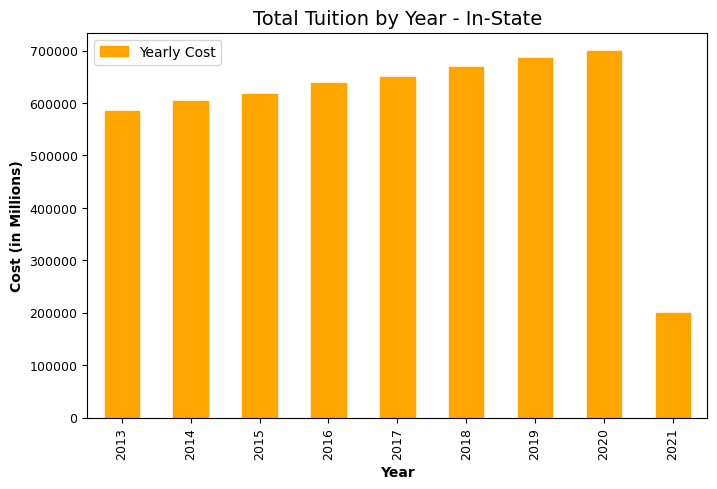

In [74]:

type_in_state = fees_tuition_data[(
    fees_tuition_data["Type"] == "Public In-State")]
type_out_state_group = type_in_state.groupby(["Year"]).sum()
colors = ["orange"]
type_out_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                          fontsize=9, edgecolor='orange',  align="center")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Tuition by Year - In-State", fontsize=14)

plt.show()
#type_out_state_group


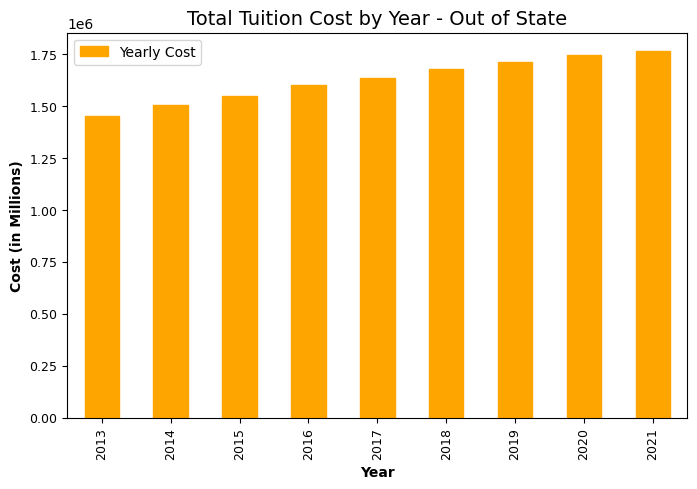

In [78]:
type_out_state = fees_tuition_data[(
    fees_tuition_data["Type"] == "Public Out-of-State")]
type_out_state_group = type_out_state.groupby(["Year"]).sum()
colors = ["orange"]
type_out_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                          fontsize=9, edgecolor='orange',  align="center")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Tuition Cost by Year - Out of State", fontsize=14)

plt.show()
#type_out_state_group


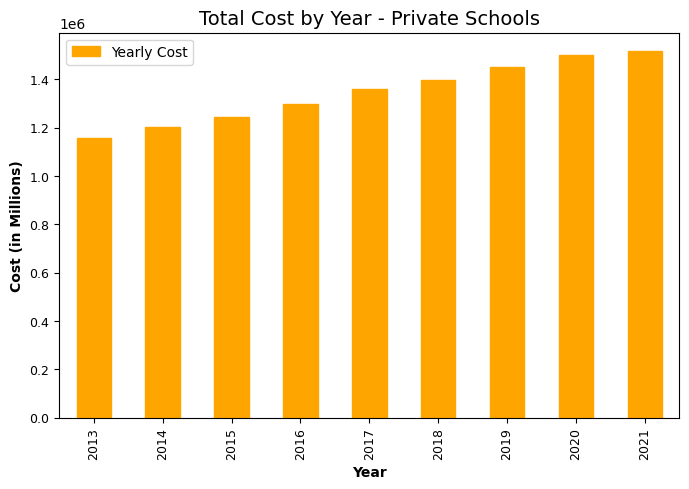

In [77]:
# type_cost_year = school_df.groupby(["State","Year","Type"])
type_private = fees_tuition_data[(fees_tuition_data["Type"] == "Private")]
private_group_year_cost = type_private.groupby(["Year"]).sum()

colors = ("orange")
private_group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                             fontsize=9, edgecolor='orange',  align="center")
plt.rcParams["figure.facecolor"]
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - Private Schools", fontsize=14)
plt.show()
#private_group_year_cost


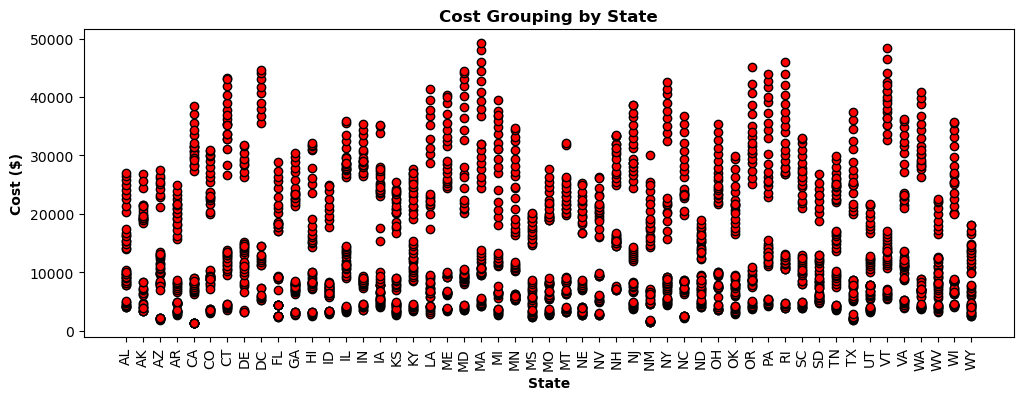

In [80]:
plt.figure(figsize=(12, 4))
plt.scatter(fees_tuition_data["State Code"], fees_tuition_data["Cost"],
            marker="o", facecolors="red", edgecolors="black")
plt.xticks(rotation="vertical")
plt.title("Cost Grouping by State",
          fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")

plt.show()



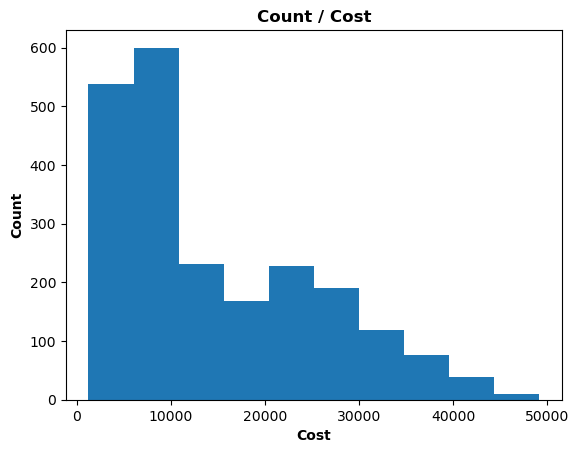

In [81]:
plt.hist(fees_tuition_data["Cost"])
 
plt.title("Count / Cost",
          fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.xlabel("Cost", fontweight="bold")
# plt.savefig(os.path.join("output", "four_comparison_2019_2021.png"))
plt.show()
